### Se importan las librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### Se extrae e importan 2 df y se almacenan en variables diferentes, el cual se lee desde la wiki fandom del honkai. 

In [2]:
characterUrl = pd.read_html('https://honkai-star-rail.fandom.com/wiki/Character')
playableCharacters = characterUrl[1]
upcomingCharacters = characterUrl[2]

playableCharacters.head()

,Icon,Name,Rarity,Path,Combat Type
0,NaN,Arlan,NaN,Destruction,Lightning
1,NaN,Asta,NaN,Harmony,Fire
2,NaN,Bailu,NaN,Abundance,Lightning
3,NaN,Blade,NaN,Destruction,Wind
4,NaN,Bronya,NaN,Harmony,Wind


### Se dropean columnas no relevantes y/o vacias de los df

In [3]:
playableCharacters.drop(columns=['Icon', 'Rarity'], inplace=True)
upcomingCharacters.drop(columns=['Icon', 'Rarity'], inplace=True)
playableCharacters.head()

,Name,Path,Combat Type
0,Arlan,Destruction,Lightning
1,Asta,Harmony,Fire
2,Bailu,Abundance,Lightning
3,Blade,Destruction,Wind
4,Bronya,Harmony,Wind


In [4]:
upcomingCharacters.head()

,Name,Path,Combat Type
0,Argenti,Erudition,Physical
1,Dr. Ratio,The Hunt,Imaginary
2,Hanya,Harmony,Physical
3,Ruan Mei,Harmony,Ice
4,Xueyi,Destruction,Quantum


### Se unen los df para tener un consolidado con los personajes jugables y los proximos

In [5]:
characters_df = pd.concat([playableCharacters, upcomingCharacters], ignore_index=True)

In [6]:
characters_df.head()

,Name,Path,Combat Type
0,Arlan,Destruction,Lightning
1,Asta,Harmony,Fire
2,Bailu,Abundance,Lightning
3,Blade,Destruction,Wind
4,Bronya,Harmony,Wind


### Se extrae mas informacion desde diferentes databases links para poder tener mas informacion relevante. En este caso se traen las estadisticas bases de cada personaje

In [8]:
statsUrl = pd.read_html('https://gamewith.net/honkai-starrail/article/show/38646')
statsCharacters = statsUrl[1]
statsCharacters.rename(columns={'Character': 'Name'}, inplace=True)
statsCharacters.head()

,Name,HP,ATK,DEF,SPD
0,Blade,1358,543,485,97
1,Luocha,1280,756,363,101
2,Yukong,917,599,374,107
3,Silver Wolf,1047,819,460,107
4,Jing Yuan,1164,698,485,99


### Se mergean los datos nuevos con el dataframe anterior

In [9]:
characters_df = pd.merge(characters_df, statsCharacters, on='Name')
characters_df.sample(5)

,Name,Path,Combat Type,HP,ATK,DEF,SPD
19,Serval,Erudition,Lightning,917,652,374,104
0,Arlan,Destruction,Lightning,1199,599,330,102
6,Dan Heng,The Hunt,Wind,882,546,396,110
5,Clara,Destruction,Physical,1319,737,485,90
7,Gepard,Preservation,Ice,1397,543,654,92


In [10]:
characters_df.describe()

,HP,ATK,DEF,SPD
count,26.000000,26.000000,26.000000,26.000000
mean,1091.038462,612.923077,444.192308,101.961538
std,169.899613,86.456890,74.813913,6.089209
min,846.000000,476.000000,330.000000,90.000000
25%,936.250000,546.000000,396.000000,98.000000
50%,1047.000000,599.000000,438.500000,101.500000
75%,1230.500000,652.000000,485.000000,106.750000
max,1397.000000,819.000000,654.000000,115.000000


In [11]:
characters_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         26 non-null     object
 1   Path         26 non-null     object
 2   Combat Type  26 non-null     object
 3   HP           26 non-null     int64 
 4   ATK          26 non-null     int64 
 5   DEF          26 non-null     int64 
 6   SPD          26 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 1.6+ KB


Se utiliza la libreria de ydata para obtener profile report, pero al parecer tiene varios bugs desde jupyter (esto no sucede desde vsc)

In [12]:
profileData = ProfileReport(characters_df, title='Honkai Impact 3rd Characters Profile Report', explorative=True)
profileData.to_file('HonkaiImpact3rdCharactersProfileReport.html')

NameError: name 'ProfileReport' is not defined

# Arrancan las visualizaciones de datos para entender mas el dataset

<AxesSubplot:xlabel='Path', ylabel='count'>

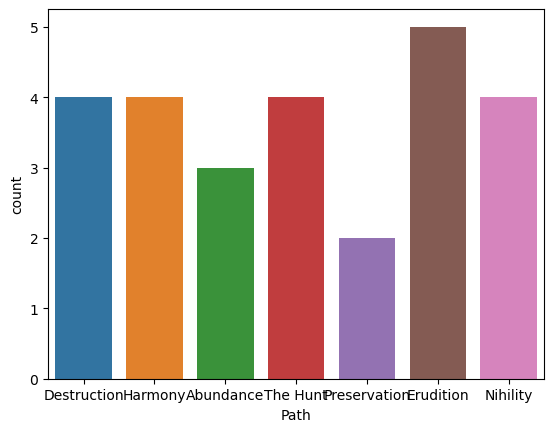

In [13]:
sns.countplot(x='Path',
            data=characters_df)

Se observa la distribucion de los personajes segun su Path

### Se realizan varios scatterplots para ver si existe alguna relacion entre los stats de los personajes

<AxesSubplot:xlabel='HP', ylabel='SPD'>

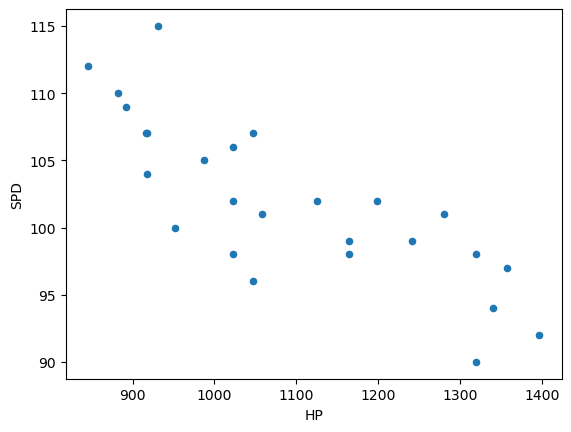

In [19]:
characters_df.plot.scatter(x='HP', y='SPD')

<AxesSubplot:xlabel='HP', ylabel='DEF'>

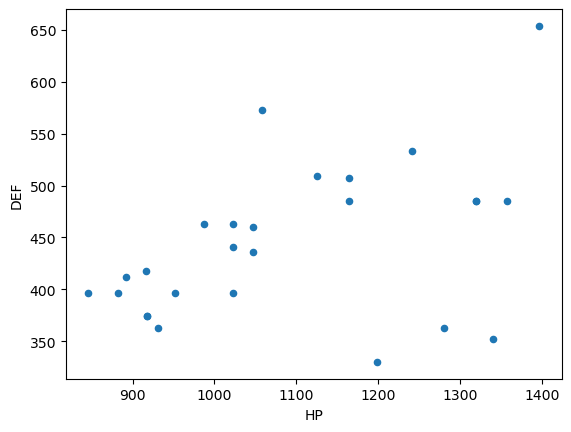

In [20]:
characters_df.plot.scatter(x='HP', y='DEF')

<AxesSubplot:xlabel='ATK', ylabel='SPD'>

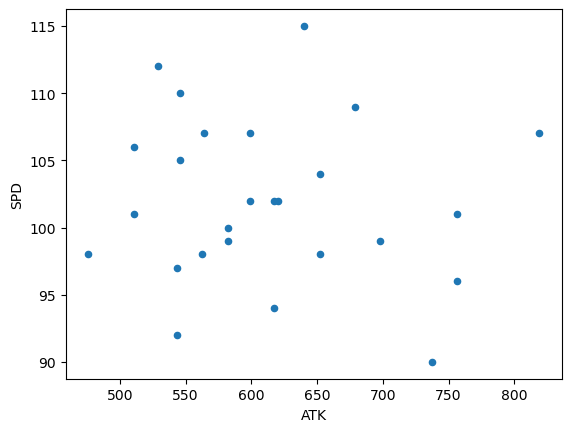

In [21]:
characters_df.plot.scatter(x='ATK', y='SPD')

<AxesSubplot:xlabel='HP', ylabel='ATK'>

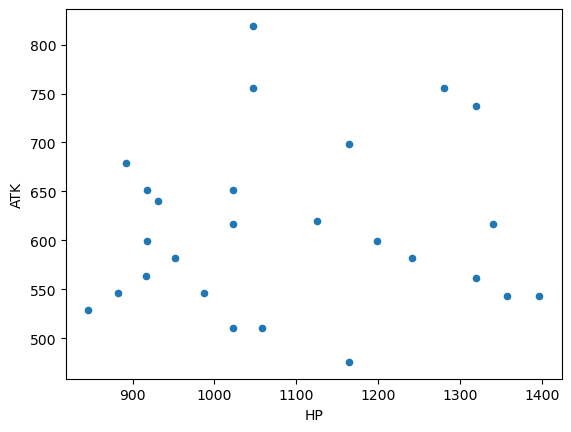

In [22]:
characters_df.plot.scatter(x='HP', y='ATK')

<AxesSubplot:xlabel='DEF', ylabel='SPD'>

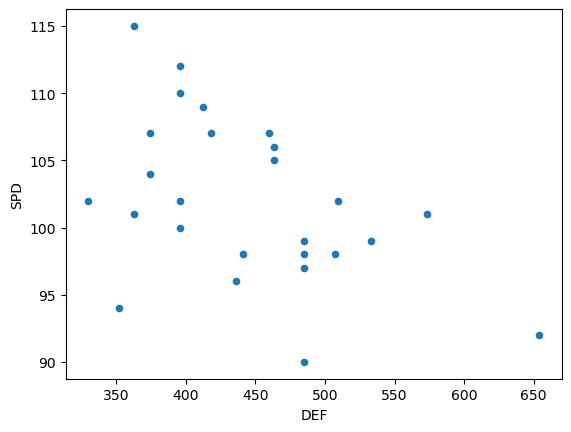

In [23]:
characters_df.plot.scatter(x='DEF', y='SPD')

Se puede observar que hay una alta correlacion entre SPD Y HP. Al ser mayor la velocidad de un personaje, menor es su cantidad de vida base. Al ser mayor su vida, su movimiento sera menor.

<AxesSubplot:xlabel='SPD', ylabel='HP'>

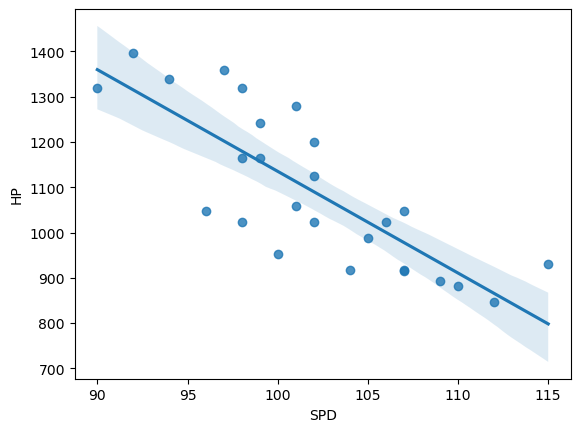

In [29]:
sns.regplot(x='SPD', y='HP', data=characters_df)

<AxesSubplot:xlabel='SPD', ylabel='HP'>

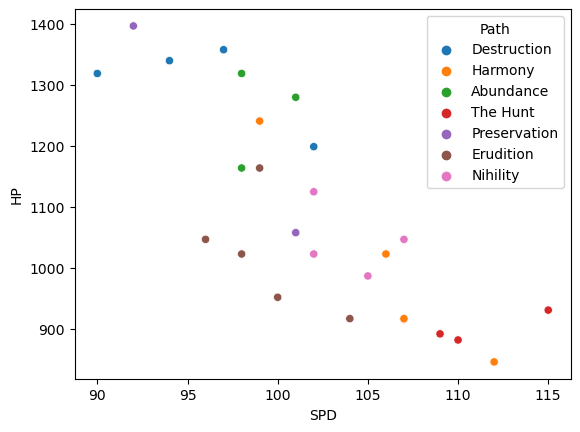

In [31]:
sns.scatterplot(x='SPD', y='HP', hue='Path', data=characters_df)